### Install datasets package to load datasets from hugging face

In [32]:
import datasets

In [33]:
# Download UC Berkeley DLab "Measuring Hate Speech" Dataset
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'default')   
df = dataset['train'].to_pandas()
df.describe()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [34]:
print("Size of dataset:", len(df))

Size of dataset: 135556


In [35]:
print("Column Names:\n", df.columns.to_list())

Column Names:
 ['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'hatespeech', 'hate_speech_score', 'text', 'infitms', 'outfitms', 'annotator_severity', 'std_err', 'annotator_infitms', 'annotator_outfitms', 'hypothesis', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern', 'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_race_other', 'target_race', 'target_religion_atheist', 'target_religion_buddhist', 'target_religion_christian', 'target_religion_hindu', 'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 'target_religion_other', 'target_religion', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_specific_country', 'target_origin_undocumented', 'target_origin_other', 'target_origin', 'target_gender_men', 'target_gender_non_binary', 'target_gender_tr

## Split Dataset

In [36]:
from sklearn.model_selection import train_test_split
X = df["text"]
y = [1 if score > -1 else 0 for score in df["hate_speech_score"]]

X_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=21)
x_train, x_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=21)

In [37]:
print("Size of X and Y test: ", len(x_test)," ", len(y_test))
print("Size of X and Y val: ", len(x_val)," ", len(y_val))
print("Size of X and Y train: ", len(x_train)," ", len(y_train))
print(type(x_test))
print(type(y_test))

Size of X and Y test:  20334   20334
Size of X and Y val:  17284   17284
Size of X and Y train:  97938   97938
<class 'pandas.core.series.Series'>
<class 'list'>


<Axes: >

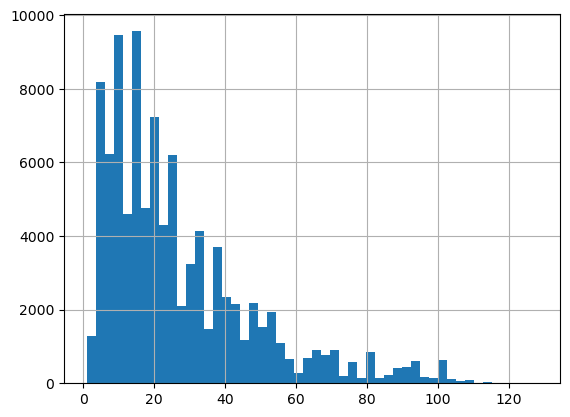

In [38]:
import pandas as pd
# Visualize how long the training text is
seq_len = [len(i.split()) for i in x_train]
pd.Series(seq_len).hist(bins = 50)

# CNN

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter

## Vocab and Tokenize

In [40]:
def tokenize(text):
    return text.lower().split()  

# vocab builder on training data
counter = Counter()
for text in x_train:
    counter.update(tokenize(text))

In [41]:
min_freq = 2
vocab = {word: i+2 for i, (word, freq) in enumerate(counter.items()) if freq >= min_freq}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

In [42]:
def remap_vocab(vocab):
    new_vocab = {}
    for new_index, token in enumerate(vocab.keys()):
        new_vocab[token] = new_index
    return new_vocab

vocab = remap_vocab(vocab)
vocab_size = len(vocab)

In [43]:
def text_to_sequence(text, vocab, max_len):
    tokens = tokenize(text)
    seq = [vocab.get(token, vocab["<UNK>"]) for token in tokens]
    # pad/truncate the sequence
    if len(seq) < max_len:
        seq += [vocab["<PAD>"]] * (max_len - len(seq))
    else:
        seq = seq[:max_len]
    return np.array(seq)

max_len = 100

### Build Torch Datasets 

In [44]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len, raw_scores=None):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels
        self.vocab = vocab
        self.max_len = max_len
        self.raw_scores = raw_scores.reset_index(drop=True) if raw_scores is not None else None

    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        sequence = text_to_sequence(text, self.vocab, self.max_len)
        if self.raw_scores is not None:
            raw_score = self.raw_scores[idx]
            return torch.LongTensor(sequence), torch.tensor(label, dtype=torch.long), torch.tensor(raw_score, dtype=torch.float)
        return torch.LongTensor(sequence), torch.tensor(label, dtype=torch.long)

In [45]:
# Create datasets
train_dataset = TextDataset(x_train, y_train, vocab, max_len)
val_dataset   = TextDataset(x_val, y_val, vocab, max_len)

# Create dataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)

#Need to augment my TestLoader to include raw hate_speech_score for plotting after training
raw_test = df.loc[x_test.index, "hate_speech_score"]
test_dataset  = TextDataset(x_test, y_test, vocab, max_len, raw_scores=raw_test)
test_loader   = DataLoader(test_dataset, batch_size=batch_size)

## CNN Model Architecture

In [46]:
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, 
                      out_channels=num_filters, 
                      kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(num_filters * len(filter_sizes), num_classes)
        
    def forward(self, x):
        x = self.embedding(x)  
        x = x.unsqueeze(1)     
        
        conved = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]
        pooled = [torch.max(conv_out, dim=2)[0] for conv_out in conved]
        cat = torch.cat(pooled, dim=1)
        cat = self.dropout(cat)
        out = self.fc(cat)
        return out

### Hyperparameters

In [47]:
vocab_size = len(vocab)
embedding_dim = 100
num_filters = 100
filter_sizes = [3, 4, 5]  
num_classes = 2  
dropout = 0.3

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = TextCNN(vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout)
model = model.to(device)

cuda


In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 35

## Train CNN

In [60]:
import time # to time training

In [21]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

best_val_loss = float('inf')  

start = time.time()
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for batch_texts, batch_labels in train_loader:
        batch_texts, batch_labels = batch_texts.to(device), batch_labels.to(device)
        sample_batch, _ = next(iter(train_loader))

        optimizer.zero_grad()
        outputs = model(batch_texts)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_texts.size(0)
        _, predicted = torch.max(outputs, 1)
        train_total += batch_labels.size(0)
        train_correct += (predicted == batch_labels).sum().item()
        
    avg_train_loss = train_loss / train_total
    train_accuracy = train_correct / train_total
    
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch_texts, batch_labels in val_loader:
            batch_texts, batch_labels = batch_texts.to(device), batch_labels.to(device)
            outputs = model(batch_texts)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item() * batch_texts.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += batch_labels.size(0)
            val_correct += (predicted == batch_labels).sum().item()
            
    avg_val_loss = val_loss / val_total
    val_accuracy = val_correct / val_total
    
    # metrics for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Val Loss: {avg_val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_CNN_model.pth')
        print(f"Saved best model at epoch {epoch+1} with validation loss: {best_val_loss:.4f}")
end = time.time()    

Epoch 1/35 - Train Loss: 0.4590 - Train Accuracy: 0.7528 - Val Loss: 0.3787 - Val Accuracy: 0.8087
Saved best model at epoch 1 with validation loss: 0.3787
Epoch 2/35 - Train Loss: 0.3687 - Train Accuracy: 0.8151 - Val Loss: 0.3384 - Val Accuracy: 0.8396
Saved best model at epoch 2 with validation loss: 0.3384
Epoch 3/35 - Train Loss: 0.3280 - Train Accuracy: 0.8445 - Val Loss: 0.3142 - Val Accuracy: 0.8569
Saved best model at epoch 3 with validation loss: 0.3142
Epoch 4/35 - Train Loss: 0.2979 - Train Accuracy: 0.8637 - Val Loss: 0.2875 - Val Accuracy: 0.8758
Saved best model at epoch 4 with validation loss: 0.2875
Epoch 5/35 - Train Loss: 0.2720 - Train Accuracy: 0.8791 - Val Loss: 0.2668 - Val Accuracy: 0.8877
Saved best model at epoch 5 with validation loss: 0.2668
Epoch 6/35 - Train Loss: 0.2505 - Train Accuracy: 0.8894 - Val Loss: 0.2506 - Val Accuracy: 0.8979
Saved best model at epoch 6 with validation loss: 0.2506
Epoch 7/35 - Train Loss: 0.2340 - Train Accuracy: 0.8989 - Val L

In [22]:
model.load_state_dict(torch.load('best_CNN_model.pth'))

<All keys matched successfully>

#### Plot Metrics

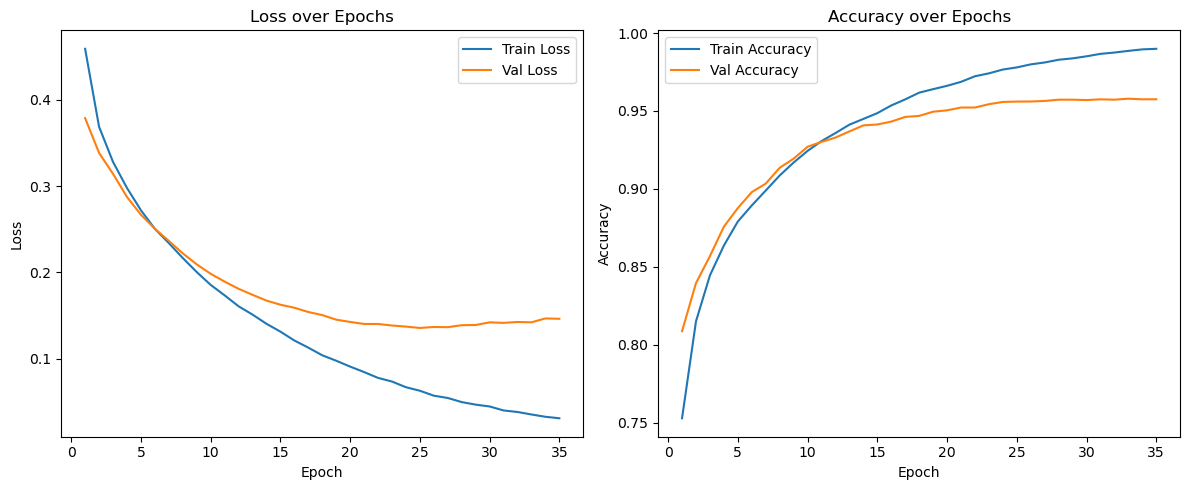

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

#### Save Model

In [24]:
torch.save(model.state_dict(), 'CNN_state_dict.pth')

## Evaluate Model

In [50]:
model = TextCNN(vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout)
model.load_state_dict(torch.load('CNN_state_dict.pth'))
model = model.to(device)
model.eval() 

TextCNN(
  (embedding): Embedding(55602, 100)
  (convs): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
    (1): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
    (2): Conv2d(1, 100, kernel_size=(5, 100), stride=(1, 1))
  )
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=300, out_features=2, bias=True)
)

Test Accuracy: 0.9563
Test AUROC: 0.9868


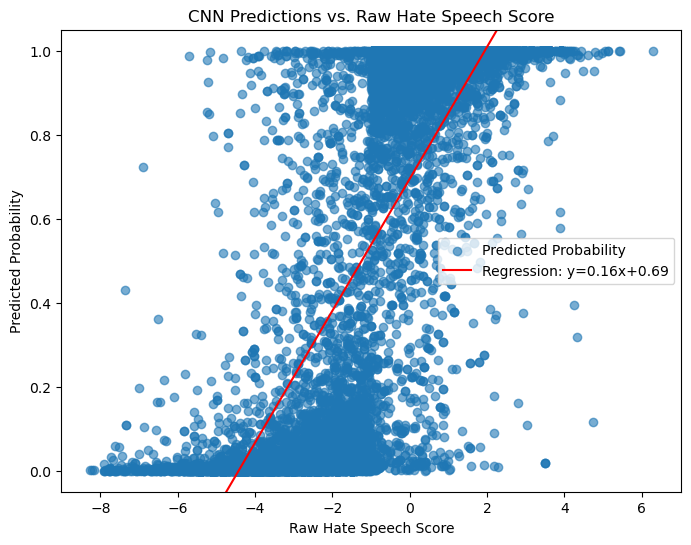

Pearson Correlation: 0.8131 (p-value: 0.0000e+00)


In [54]:
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr

model.eval()
correct = 0
total = 0

all_labels = []
all_probs = []
all_raw = []

with torch.no_grad():
    for batch in test_loader:
        batch_texts, batch_labels, batch_raw = batch
        batch_texts = batch_texts.to(device)
        batch_labels = batch_labels.to(device)
        batch_raw = batch_raw.to(device)
        
        outputs = model(batch_texts) 
        
        probs = F.softmax(outputs, dim=1)[:, 1]  # shape: [batch_size]
        _, predicted = torch.max(outputs, 1)
        
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
        
        all_labels.extend(batch_labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())
        all_raw.extend(batch_raw.cpu().numpy())

test_accuracy = correct / total
auroc = roc_auc_score(all_labels, all_probs)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUROC: {auroc:.4f}")
#print(f"Time to train {num_epochs} epochs: {end - start}")

plt.figure(figsize=(8, 6))
plt.scatter(all_raw, all_probs, alpha=0.6, label="Predicted Probability")

slope, intercept = np.polyfit(all_raw, all_probs, 1)
x_vals = np.linspace(min(all_raw), max(all_raw), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f"Regression: y={slope:.2f}x+{intercept:.2f}")

plt.xlabel("Raw Hate Speech Score")
plt.ylabel("Predicted Probability")
plt.title("CNN Predictions vs. Raw Hate Speech Score")
plt.ylim(-0.05,1.05)
plt.legend()
plt.show()

# Pearson Correlation
corr, p_val = pearsonr(all_raw, all_probs)
print(f"Pearson Correlation: {corr:.4f} (p-value: {p_val:.4e})")

# Stacked BiDirectional LSTM

## Model

In [67]:
class StackedBiLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=64, hidden_dim1=64, hidden_dim2=32, dropout=0.5, num_classes=1):
        super(StackedBiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim1, batch_first=True, bidirectional=True)
        
        self.lstm2 = nn.LSTM(hidden_dim1 * 2, hidden_dim2, batch_first=True, bidirectional=True)
        
        self.fc1 = nn.Linear(hidden_dim2 * 2, 64)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, num_classes)
        
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)  
        out, _ = self.lstm1(x)  
        out2, (hn, cn) = self.lstm2(out)
        hn_cat = torch.cat((hn[0], hn[1]), dim=1)  
        x = self.fc1(hn_cat)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x  


In [68]:
vocab_size = len(vocab) 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Hyper Params

In [84]:
num_epochs = 40
embedding_dim = 128
hidden_dim1 = 128
hidden_dim2 = 64
dropout = 0.4
model = StackedBiLSTM(vocab_size=vocab_size,embedding_dim=embedding_dim,hidden_dim1=hidden_dim1,hidden_dim2=hidden_dim2,dropout=dropout,num_classes=2).to(device)

In [85]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001

## Training

In [86]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
best_val_loss = float('inf')  

start = time.time()
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_texts, batch_labels in train_loader:
        batch_texts = batch_texts.to(device)
        batch_labels = batch_labels.to(device).long()
        
        optimizer.zero_grad()
        outputs = model(batch_texts)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * batch_texts.size(0)
        predicted = outputs.argmax(dim=1)
        train_total += batch_labels.size(0)
        train_correct += (predicted == batch_labels).sum().item()
    
    avg_train_loss = running_train_loss / train_total
    train_accuracy = train_correct / train_total
    

    model.eval()
    running_val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch_texts, batch_labels in val_loader:
            batch_texts = batch_texts.to(device)
            batch_labels = batch_labels.to(device).long()
            outputs = model(batch_texts)  
            loss = criterion(outputs, batch_labels)
            running_val_loss += loss.item() * batch_texts.size(0)
            predicted = outputs.argmax(dim=1)
            val_total += batch_labels.size(0)
            val_correct += (predicted == batch_labels).sum().item()
            
    avg_val_loss = running_val_loss / val_total
    val_accuracy = val_correct / val_total

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f} - Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_LSTM_model.pth')
        print(f"Saved best model at epoch {epoch+1} with validation loss: {best_val_loss:.4f}")
end = time.time()

Epoch 1/40 - Train Loss: 0.4481, Train Acc: 0.7731 - Val Loss: 0.3606, Val Acc: 0.8273
Saved best model at epoch 1 with validation loss: 0.3606
Epoch 2/40 - Train Loss: 0.3232, Train Acc: 0.8502 - Val Loss: 0.3211, Val Acc: 0.8481
Saved best model at epoch 2 with validation loss: 0.3211
Epoch 3/40 - Train Loss: 0.2699, Train Acc: 0.8816 - Val Loss: 0.2963, Val Acc: 0.8614
Saved best model at epoch 3 with validation loss: 0.2963
Epoch 4/40 - Train Loss: 0.2249, Train Acc: 0.9060 - Val Loss: 0.2689, Val Acc: 0.8796
Saved best model at epoch 4 with validation loss: 0.2689
Epoch 5/40 - Train Loss: 0.1875, Train Acc: 0.9256 - Val Loss: 0.2444, Val Acc: 0.8966
Saved best model at epoch 5 with validation loss: 0.2444
Epoch 6/40 - Train Loss: 0.1556, Train Acc: 0.9396 - Val Loss: 0.2314, Val Acc: 0.9041
Saved best model at epoch 6 with validation loss: 0.2314
Epoch 7/40 - Train Loss: 0.1290, Train Acc: 0.9507 - Val Loss: 0.2199, Val Acc: 0.9110
Saved best model at epoch 7 with validation loss:

In [87]:
model.load_state_dict(torch.load('best_LSTM_model.pth'))

<All keys matched successfully>

## Plotting Metrics

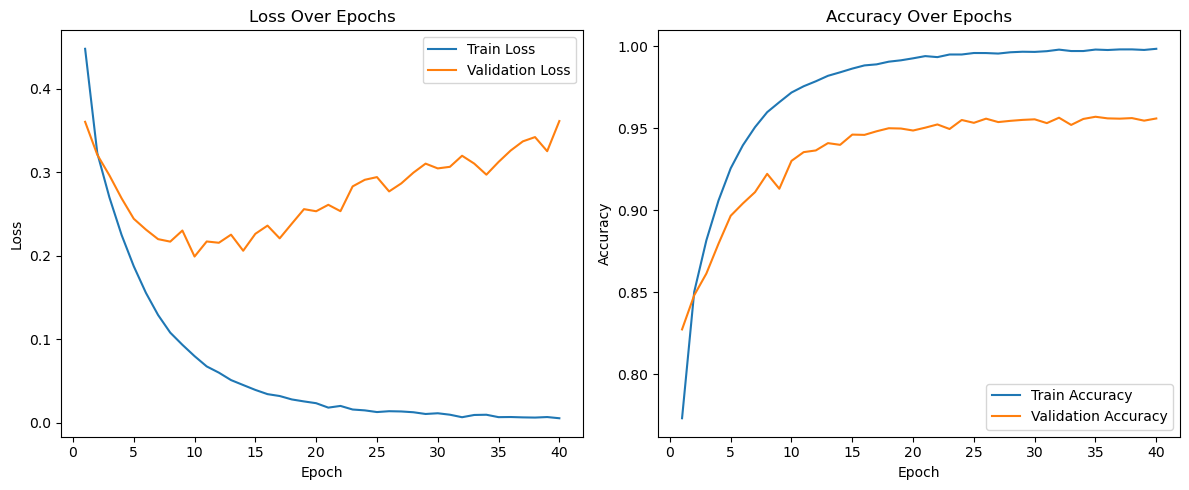

In [88]:
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [91]:
torch.save(model.state_dict(), 'Bi-directionalLSM_state_dict.pth')

##  Model Evaluation

In [ ]:
model = StackedBiLSTM(vocab_size=vocab_size,
                      embedding_dim=embedding_dim,
                      hidden_dim1=hidden_dim1,
                      hidden_dim2=hidden_dim2,
                      dropout=dropout,
                      num_classes=num_classes)
state_dict = torch.load('Bi-directionalLSM_state_dict.pth', map_location=device)
model.load_state_dict(state_dict)
model.to(device)
model.eval()

Test Accuracy: 0.9317
Test AUROC: 0.9782


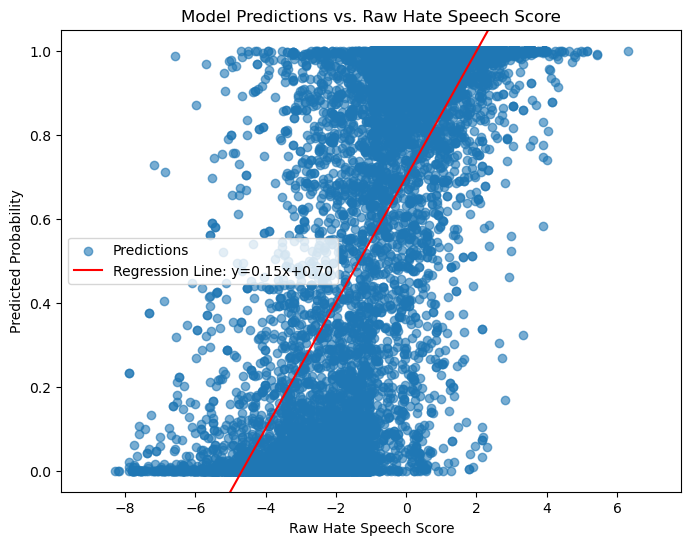

Pearson Correlation: 0.7988 (p-value: 0.0000e+00)
Time to train 40 epochs: 478.7354066371918


In [100]:
model.eval()
all_probs = []   
all_labels = []   
all_raw = []     
correct = 0
total = 0

with torch.no_grad():
    for batch_texts, batch_labels, batch_raw in test_loader:
        batch_texts = batch_texts.to(device)
        batch_labels = batch_labels.to(device).float()
        
        outputs = model(batch_texts)  
        
        probs = F.softmax(outputs, dim=1)[:, 1] 
        all_probs.extend(probs.detach().cpu().numpy().tolist())
        
        labels = batch_labels.cpu().numpy()
        if labels.ndim > 1 and labels.shape[-1] > 1:
            labels = np.argmax(labels, axis=-1)
        else:
            labels = labels.squeeze()
        all_labels.extend(labels.tolist())
        
        all_raw.extend(batch_raw.cpu().numpy().squeeze().tolist())
        predicted = np.argmax(outputs.detach().cpu().numpy(), axis=1)
        total += batch_labels.size(0)
        correct += (predicted == labels).sum().item()


# test accuracy and AUROC
test_accuracy = correct / total
auroc = roc_auc_score(all_labels, all_probs)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUROC: {auroc:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(all_raw, all_probs, alpha=0.6, label="Predictions")

#linear regression line
slope, intercept = np.polyfit(all_raw, all_probs, 1)
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label=f"Regression Line: y={slope:.2f}x+{intercept:.2f}")

plt.xlabel("Raw Hate Speech Score")
plt.ylabel("Predicted Probability")
plt.title("Model Predictions vs. Raw Hate Speech Score")
plt.ylim(-0.05,1.05)
plt.legend()
plt.show()


corr, p_val = pearsonr(all_raw, all_probs)
print(f"Pearson Correlation: {corr:.4f} (p-value: {p_val:.4e})")
print(f"Time to train {num_epochs} epochs: {end-start}")

# Bi-Directional Conv-LSTM

In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BiConvLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, conv_channels=128, 
                 lstm_hidden_dim=64, dropout=0.5, num_classes=2, kernel_size=3):
        super(BiConvLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        self.conv = nn.Conv1d(in_channels=embedding_dim, 
                              out_channels=conv_channels, 
                              kernel_size=kernel_size, 
                              padding=kernel_size // 2)
        
        self.lstm = nn.LSTM(input_size=conv_channels, 
                            hidden_size=lstm_hidden_dim, 
                            batch_first=True, 
                            bidirectional=True)
        
        self.dropout = nn.Dropout(dropout)
        
        self.fc = nn.Linear(lstm_hidden_dim * 2, num_classes)
        
    def forward(self, x):
        x = self.embedding(x) 
        
        x = x.permute(0, 2, 1) 
        x = self.conv(x)       
        x = F.relu(x)
        x = x.permute(0, 2, 1)
        out, (hn, cn) = self.lstm(x)
        hn_cat = torch.cat((hn[0], hn[1]), dim=1)  
        x = self.dropout(hn_cat)
        x = self.fc(x)  
        return x

## Hyperparameters

In [115]:
embedding_dim=128
conv_channels=128
lstm_hidden_dim=64
dropout=0.5
num_epochs = 25

### Define Model

In [116]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = BiConvLSTM(vocab_size=vocab_size,
                   embedding_dim=embedding_dim,
                   conv_channels=conv_channels,
                   lstm_hidden_dim=lstm_hidden_dim,
                   dropout=dropout,
                   num_classes=2,
                   kernel_size=3).to(device)


cuda


In [117]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

## Training Loop

In [118]:
best_val_loss = float('inf')
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_train = time.time()
for epoch in range(num_epochs):
    start_time = time.time()
    
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch in train_loader:
        texts, labels = batch  
        texts = texts.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * texts.size(0)
        predicted = outputs.argmax(dim=1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    
    avg_train_loss = running_train_loss / train_total
    train_accuracy = train_correct / train_total

    model.eval()
    running_val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch in val_loader:
            texts, labels = batch
            texts = texts.to(device)
            labels = labels.to(device)
            
            outputs = model(texts)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * texts.size(0)
            
            predicted = outputs.argmax(dim=1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    avg_val_loss = running_val_loss / val_total
    val_accuracy = val_correct / val_total
    epoch_time = time.time() - start_time
    
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Time: {epoch_time:.2f}s | Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
    
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_bi-convLSTM_model.pth')
        print(f"Saved best model at epoch {epoch+1} with Val Loss: {best_val_loss:.4f}")
end_train = time.time()

Epoch 1/25 - Time: 8.53s | Train Loss: 0.4587, Train Acc: 0.7655 | Val Loss: 0.3842, Val Acc: 0.8055
Saved best model at epoch 1 with Val Loss: 0.3842
Epoch 2/25 - Time: 8.53s | Train Loss: 0.3344, Train Acc: 0.8423 | Val Loss: 0.3209, Val Acc: 0.8456
Saved best model at epoch 2 with Val Loss: 0.3209
Epoch 3/25 - Time: 8.55s | Train Loss: 0.2763, Train Acc: 0.8771 | Val Loss: 0.2895, Val Acc: 0.8669
Saved best model at epoch 3 with Val Loss: 0.2895
Epoch 4/25 - Time: 8.51s | Train Loss: 0.2251, Train Acc: 0.9048 | Val Loss: 0.2805, Val Acc: 0.8732
Saved best model at epoch 4 with Val Loss: 0.2805
Epoch 5/25 - Time: 8.47s | Train Loss: 0.1853, Train Acc: 0.9245 | Val Loss: 0.2445, Val Acc: 0.8974
Saved best model at epoch 5 with Val Loss: 0.2445
Epoch 6/25 - Time: 8.39s | Train Loss: 0.1485, Train Acc: 0.9420 | Val Loss: 0.2319, Val Acc: 0.9079
Saved best model at epoch 6 with Val Loss: 0.2319
Epoch 7/25 - Time: 8.64s | Train Loss: 0.1221, Train Acc: 0.9537 | Val Loss: 0.2219, Val Acc: 

In [119]:
model.load_state_dict(torch.load('best_bi-convLSTM_model.pth'))

<All keys matched successfully>

## Plot Metrics

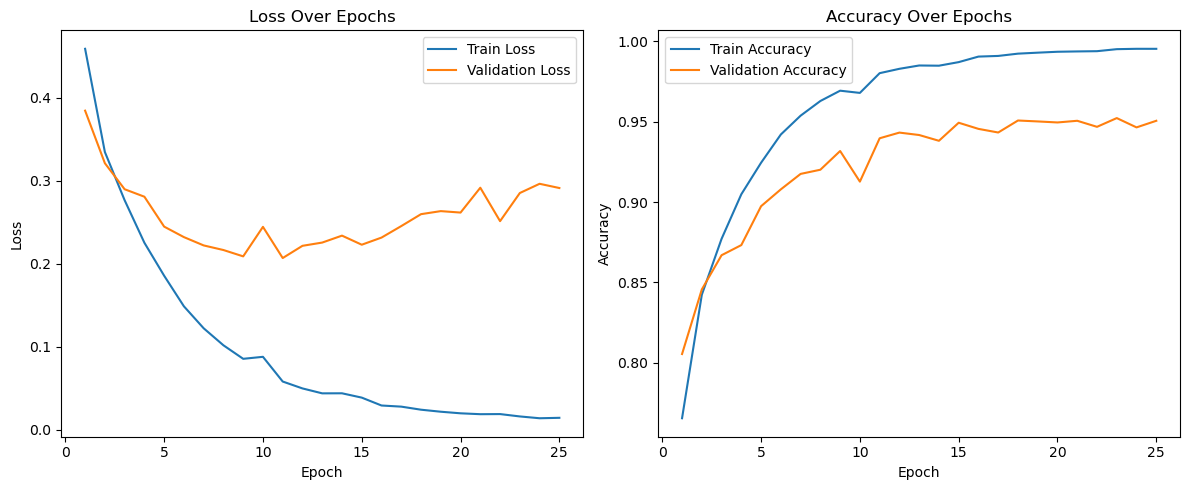

In [120]:
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Save Model

In [121]:
torch.save(model.state_dict(), 'BiConvLSTM.pth')

## Evaluate Model

Test Accuracy: 0.9419
Test AUROC: 0.9798
Pearson Correlation: 0.7955 (p-value: 0.0000e+00)
Time to train 25 epochs: 212.71414637565613


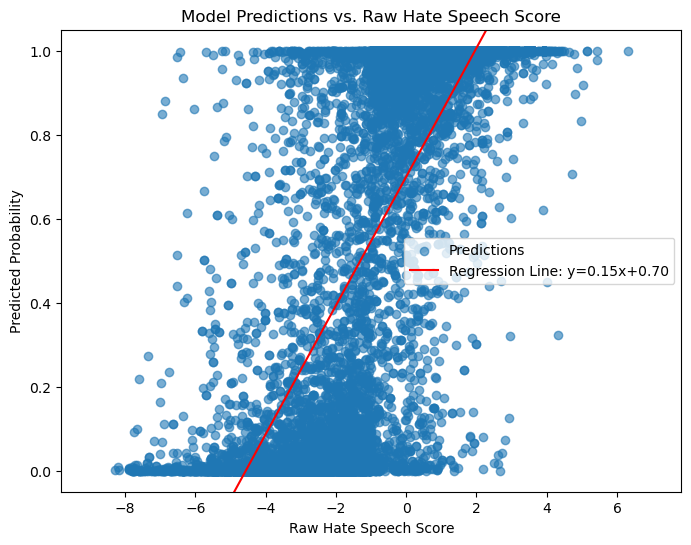

In [124]:
model.eval()
all_probs = []   
all_labels = []   
all_raw = []     
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        texts, labels, raw = batch
        texts = texts.to(device)
        labels = labels.to(device).float() 
        raw = raw.to(device)
        
        outputs = model(texts)  
        
        probs = F.softmax(outputs, dim=1)[:, 1]
        all_probs.extend(probs.detach().cpu().numpy().tolist())
        labels_np = labels.cpu().numpy()
        if labels_np.ndim > 1 and labels_np.shape[-1] > 1:
            labels_np = np.argmax(labels_np, axis=-1)
        else:
            labels_np = labels_np.squeeze()
        all_labels.extend(labels_np.tolist())
        
        all_raw.extend(raw.cpu().numpy().squeeze().tolist())
        predicted = np.argmax(outputs.detach().cpu().numpy(), axis=1)
        total += labels.size(0)
        correct += (predicted == labels_np).sum().item()

test_accuracy = correct / total
auroc = roc_auc_score(all_labels, all_probs)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUROC: {auroc:.4f}")
corr, p_val = pearsonr(all_raw, all_probs)
print(f"Pearson Correlation: {corr:.4f} (p-value: {p_val:.4e})")
print(f"Time to train {num_epochs} epochs: {end_train - start_train}")
plt.figure(figsize=(8, 6))
plt.scatter(all_raw, all_probs, alpha=0.6, label="Predictions")

slope, intercept = np.polyfit(all_raw, all_probs, 1)
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label=f"Regression Line: y={slope:.2f}x+{intercept:.2f}")

plt.xlabel("Raw Hate Speech Score")
plt.ylabel("Predicted Probability")
plt.title("Model Predictions vs. Raw Hate Speech Score")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()

# BERT

## Load Model

In [129]:
model_name = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# freeze layers and only fine-tune output
for param in model.bert.parameters():
    param.requires_grad = False

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

C:\anaconda\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Arya Rahmanian\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [130]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

## Build Dataset

In [148]:
from torch.utils.data import Dataset, DataLoader
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, get_linear_schedule_with_warmup

class BertTextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len, raw_scores=None):
        if hasattr(texts, "reset_index"):
            self.texts = texts.reset_index(drop=True)
        else:
            self.texts = texts
        if hasattr(labels, "reset_index"):
            self.labels = labels.reset_index(drop=True)
        else:
            self.labels = labels
        if raw_scores is not None:
            if hasattr(raw_scores, "reset_index"):
                self.raw_scores = raw_scores.reset_index(drop=True)
            else:
                self.raw_scores = raw_scores
        else:
            self.raw_scores = None
        
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        item = {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
        if self.raw_scores is not None:
            item['raw'] = torch.tensor(self.raw_scores[idx], dtype=torch.float)
        return item

In [149]:
max_len = 64  
batch_size = 8

x_train = pd.Series(x_train)
y_train = pd.Series(y_train)
x_val = pd.Series(x_val)
y_val = pd.Series(y_val)

train_dataset = BertTextDataset(x_train, y_train, tokenizer, max_len)
val_dataset   = BertTextDataset(x_val, y_val, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)

### Hyper-Parameters

In [134]:
optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00001)
num_epochs = 10
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0, 
                                            num_training_steps=total_steps)

C:\anaconda\Lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Train loop

In [135]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, 
                        attention_mask=attention_mask, 
                        labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        running_train_loss += loss.item() * input_ids.size(0)
        predictions = torch.argmax(logits, dim=1)
        train_total += labels.size(0)
        train_correct += (predictions == labels).sum().item()
    
    avg_train_loss = running_train_loss / train_total
    train_accuracy = train_correct / train_total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    
    model.eval()
    running_val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, 
                            attention_mask=attention_mask, 
                            labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            running_val_loss += loss.item() * input_ids.size(0)
            predictions = torch.argmax(logits, dim=1)
            val_total += labels.size(0)
            val_correct += (predictions == labels).sum().item()
    
    avg_val_loss = running_val_loss / val_total
    val_accuracy = val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
    
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_bert_model.pth')
        print(f"Saved best model at epoch {epoch+1} with Val Loss: {best_val_loss:.4f}")

end_time = time.time()
print(f"Training complete in {(end_time - start_time):.2f} seconds.")

Epoch 1/10 - Train Loss: 0.6395, Train Acc: 0.6392 | Val Loss: 0.6076, Val Acc: 0.6719
Saved best model at epoch 1 with Val Loss: 0.6076
Epoch 2/10 - Train Loss: 0.6024, Train Acc: 0.6859 | Val Loss: 0.5811, Val Acc: 0.7126
Saved best model at epoch 2 with Val Loss: 0.5811
Epoch 3/10 - Train Loss: 0.5834, Train Acc: 0.7052 | Val Loss: 0.5687, Val Acc: 0.7138
Saved best model at epoch 3 with Val Loss: 0.5687
Epoch 4/10 - Train Loss: 0.5722, Train Acc: 0.7177 | Val Loss: 0.5585, Val Acc: 0.7398
Saved best model at epoch 4 with Val Loss: 0.5585
Epoch 5/10 - Train Loss: 0.5649, Train Acc: 0.7227 | Val Loss: 0.5517, Val Acc: 0.7428
Saved best model at epoch 5 with Val Loss: 0.5517
Epoch 6/10 - Train Loss: 0.5607, Train Acc: 0.7235 | Val Loss: 0.5476, Val Acc: 0.7447
Saved best model at epoch 6 with Val Loss: 0.5476
Epoch 7/10 - Train Loss: 0.5561, Train Acc: 0.7287 | Val Loss: 0.5447, Val Acc: 0.7410
Saved best model at epoch 7 with Val Loss: 0.5447
Epoch 8/10 - Train Loss: 0.5532, Train Ac

## Plot Metrics

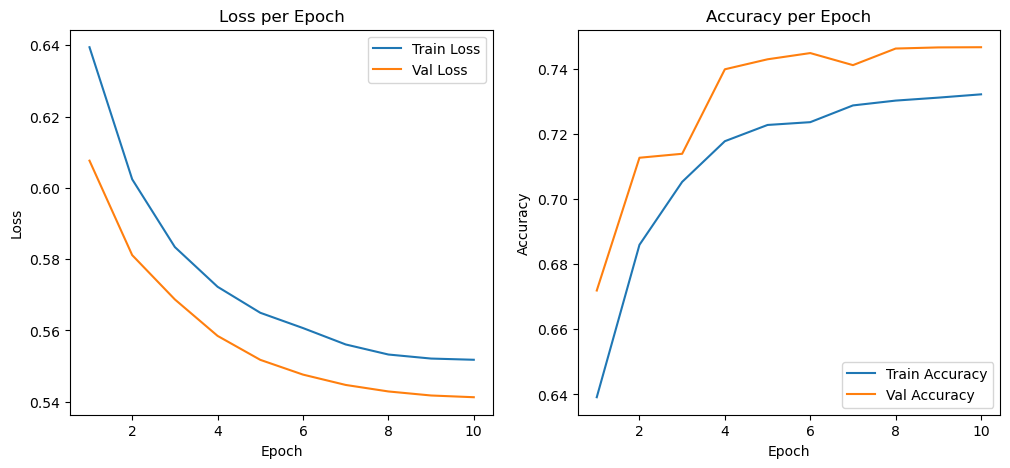

In [136]:
epochs = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.show()

## Evaluation

In [150]:
raw_test = df.loc[x_test.index, "hate_speech_score"]
test_dataset = BertTextDataset(x_test, y_test, tokenizer, max_len, raw_scores=raw_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

Test Accuracy: 0.7470
Test AUROC: 0.8046
Time to train 10 epochs: 2125.8436760902405 seconds
Pearson Correlation: 0.5858 (p-value: 0.0000e+00)


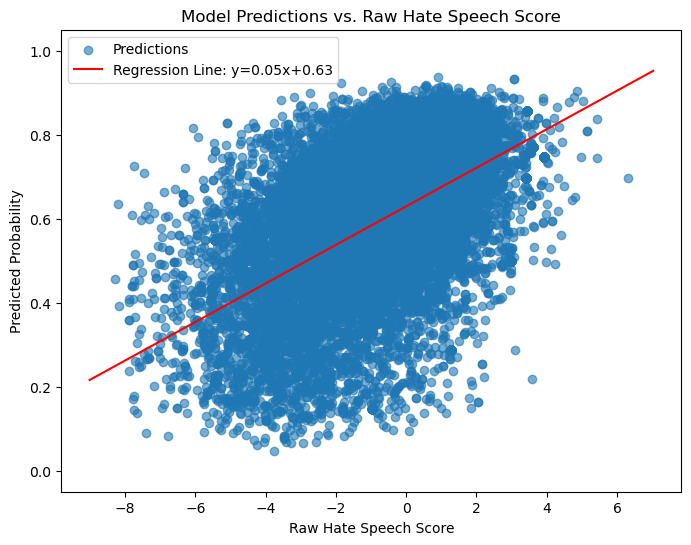

In [151]:
model.eval()
all_probs = []   
all_labels = []   
all_raw = []     
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device).float()

        raw = batch.get('raw', None)
        if raw is not None:
            raw = raw.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits  
        probs = F.softmax(logits, dim=1)[:, 1]
        all_probs.extend(probs.detach().cpu().numpy().tolist())

        labels_np = labels.cpu().numpy()
        if labels_np.ndim > 1 and labels_np.shape[-1] > 1:
            labels_np = np.argmax(labels_np, axis=-1)
        else:
            labels_np = labels_np.squeeze()
        all_labels.extend(labels_np.tolist())
        
        if raw is not None:
            all_raw.extend(raw.cpu().numpy().squeeze().tolist())
        
        predicted = np.argmax(logits.detach().cpu().numpy(), axis=1)
        total += labels.size(0)
        correct += (predicted == labels_np).sum().item()

test_accuracy = correct / total
auroc = roc_auc_score(all_labels, all_probs)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUROC: {auroc:.4f}")
print(f"Time to train {num_epochs} epochs: {end_time - start_time} seconds")

if all_raw:
    x_values = all_raw
else:
    x_values = list(range(len(all_probs)))
corr, p_val = pearsonr(all_raw, all_probs)
print(f"Pearson Correlation: {corr:.4f} (p-value: {p_val:.4e})")

plt.figure(figsize=(8, 6))
plt.scatter(all_raw, all_probs, alpha=0.6, label="Predictions")

slope, intercept = np.polyfit(all_raw, all_probs, 1)
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label=f"Regression Line: y={slope:.2f}x+{intercept:.2f}")

plt.xlabel("Raw Hate Speech Score")
plt.ylabel("Predicted Probability")
plt.title("Model Predictions vs. Raw Hate Speech Score")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()

# Analysis

### Final Performance

| Model                         | Accuracy | AUROC  | Pearson Correlation |
|-------------------------------|----------|--------|---------------------|
| **BERT**                      | 0.7470   | 0.8046 | 0.5858              |
| **Bi-directional Conv-LSTM**  | 0.9419   | 0.9798 | 0.7955              |
| **Stacked Bi-directional LSTM** | 0.9317   | 0.9782 | 0.7988              |
| **CNN**                       | **0.9563** | **0.9868** | **0.8131** |

- **CNN** shows the highest overall performance, with both accuracy (0.9563) and AUROC (0.9868), as well as the strongest correlation (0.8131).
- **Bi-directional Conv-LSTM** closely follows the CNN with high accuracy and AUROC. 
- **Stacked Bi-directional LSTM** also performs very well, just slightly behind the Conv-LSTM, showing that its able to capture the sentiement but not as well when compared to CNN architectures.
- **BERT** has noticeably lower accuracy and AUROC compared to the other models, this means that it may not be as good with sentiment analysis or the language BERT was trained on did not have such vulgar words.

##### Training

The Stacked Bi-directional LSTM showcased the greatest tendency to overfit, starting at epoch 11, closely followed by the Bi-directional Conv-LSTM, which started overfitting at epoch 12. In contrast, the CNN did not overfit until epoch around 26. Lastly, BERT showed no signs of overfitting during the 10 epochs it was fine-tuned, although its validation loss decreasing momentum had slowed down, suggesting it might have begun overfitting around epoch 13.

Additionally, BERT not only had the weakest performance scores on the test set but also trained the slowest, averaging 212 seconds per epoch. The CNN was significantly faster, requiring just 8 seconds per epoch.

